<h1 style="text-align:center;color:#0F4C81">Multioutput Classification</h1>

**Multioutput-multiclass** classification (or just **multioutput** classification) is a generalization of multilabel classification where each label can be multiclass (.e, it can have more than two possible values).

To illustrate this, let's build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier's output is multilabel (one label per pixel) and each label can have multiple values (pixel intensities ranges from 0 to 255). It is thus an example of a multioutput classification system.

Let's start by creating the training and test sets by taking the MNIST images and adding noise to their pixel intensities with `numpy`'s `randint()` function. The target images will be the original images:

In [50]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
import numpy as np
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

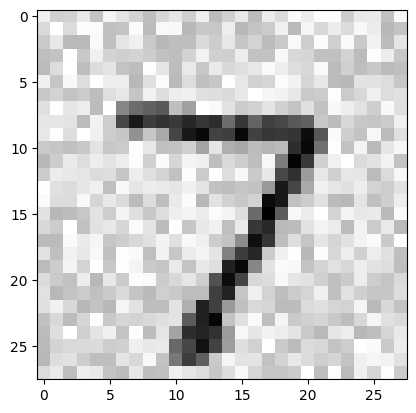

In [9]:
import matplotlib.pyplot as plt

def show_image(arr):
    plt.imshow(arr.reshape(28, 28), cmap='binary')

show_image(X_test_mod[0])
plt.show()

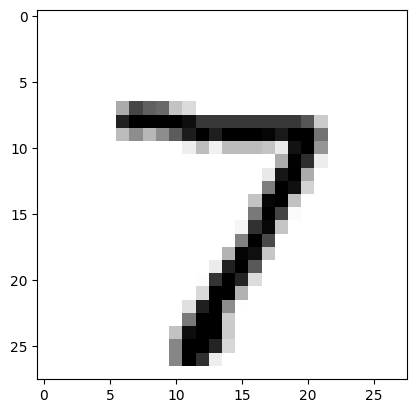

In [12]:
show_image(y_test_mod[0])
plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

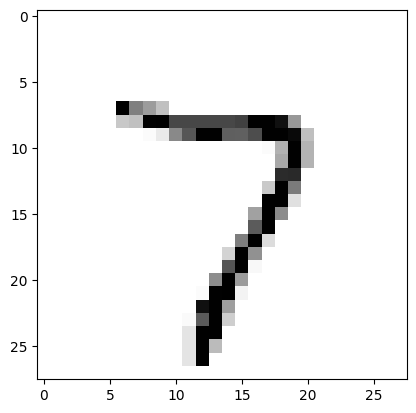

In [11]:
clean_digit = knn_clf.predict([X_test_mod[0]])
show_image(clean_digit)
plt.show()

**trying other classifiers**

In [ ]:
from sklearn.linear_model import SGDClassifier

try:
    sgd_clf = SGDClassifier()
    sgd_clf.fit(X_train_mod, y_train_mod)
except ValueError as exc:
    print("Error:", exc)

Error: y should be a 1d array, got an array of shape (60000, 784) instead.


In [21]:
class Validation:

    def __enter__(self):
        pass

    def __exit__(self, exc_type, exc_value, exc_tb):
        if exc_type is not None:
            print(f"{exc_type.__name__}:", str(exc_value))
            return True

with Validation():
    sgd_clf = SGDClassifier()
    sgd_clf.fit(X_train_mod, y_train_mod)

ValueError: y should be a 1d array, got an array of shape (60000, 784) instead.


## Repairing an image

In [40]:
def show_image(arr):
    plt.imshow(arr.reshape(28, 28), cmap='binary')
    plt.axis('off')

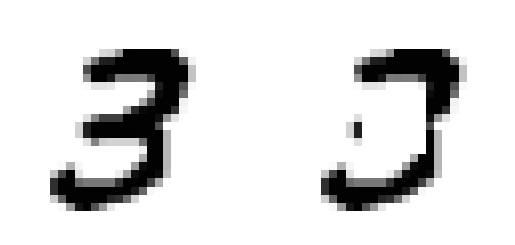

In [53]:
x_position = 10
y_position = 10
width = 8
height = 8

some_image = X_train[7].copy()

plt.subplot(1, 2, 1)
show_image(some_image)

plt.subplot(1, 2, 2)
some_image.reshape(28, 28)[x_position:x_position+width, y_position:y_position+height] = 0
show_image(some_image);

In [63]:
X_train_damaged = X_train.copy()
X_train_damaged.reshape(-1, 28, 28)[:, x_position:x_position+width, y_position:y_position+height] = 255
y_train_damaged = X_train

In [64]:
clf = KNeighborsClassifier()
clf.fit(X_train_damaged, y_train_damaged)

KNeighborsClassifier()

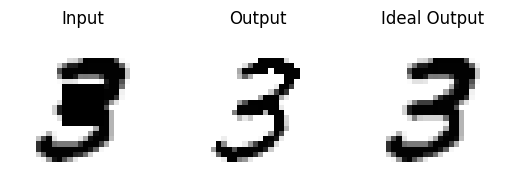

In [78]:
ix = 7
new_image = X_train_damaged[ix]
repaired_img = clf.predict([new_image])

plt.subplot(1, 3, 1)
show_image(new_image)
plt.title('Input')

plt.subplot(1, 3, 2)
show_image(repaired_img)
plt.title("Output")

plt.subplot(1, 3, 3)
show_image(y_train_damaged[ix])
plt.title("Ideal Output")
plt.show()

In [ ]:
X_train_output = clf.predict(X_train_damaged)
y_train_output = y_train_damaged

In [ ]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train_output, y_train_output)

In [ ]:
ix = 7
new_image = X_train_damaged[ix]
repaired_img = clf.predict([new_image])
repaired_img2 = clf2.predict([repaired_img])

plt.subplot(1, 4, 1)
show_image(new_image)
plt.title('Input')

plt.subplot(1, 4, 2)
show_image(repaired_img)
plt.title("Output 1")

plt.subplot(1, 4, 3)
show_image(repaired_img2)
plt.title("Output 2")

plt.subplot(1, 4, 4)
show_image(y_train_damaged[ix])
plt.title("Ideal Output")
plt.show()